## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.



#### Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
#Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# Leer el archivo CSV
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Paso 2. Prepara los datos

In [3]:
# Convertir los nombres de las columnas a minúsculas
df.columns = map(str.lower, df.columns)

In [4]:
#se convirtio la columna year_of_release de float a int por que pertenece a una columna años
#y los años no llevan decimales.
# Convertir Year_of_Release a tipo entero
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [5]:
#se convirtio la columna user_score poe que es String 
#y tiene que ser float ya que es una columna con numero decimales.
# Convertir la columna User_Score de string a float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [6]:
# Rellenar los valores faltantes con 'Unknown'
df['critic_score'].fillna('Unknown', inplace=True)
df['user_score'].fillna('Unknown', inplace=True)

# Verificar si hay otras columnas con valores faltantes
missing_values = df.isnull().sum()
if any(missing_values):
    print("Columnas con valores faltantes:")
    print(missing_values)
else:
    print("No hay valores faltantes en otras columnas.")

Columnas con valores faltantes:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64


In [7]:
# Puedes usar diferentes estrategias según corresponda, como eliminar las filas o completarlos con valores apropiados
df['name'].fillna('Unknown', inplace=True)
# En lugar de eliminar las filas con valores faltantes en 'year_of_release', imputamos estos valores con la mediana o la moda
df['year_of_release'].fillna(df['year_of_release'].median(), inplace=True)
df['genre'].fillna('Unknown', inplace=True)

# Verificar si hay otras columnas con valores faltantes
missing_values = df.isnull().sum()
if any(missing_values):
    print("Columnas con valores faltantes:")
    print(missing_values)
else:
    print("No hay valores faltantes en otras columnas.")

Columnas con valores faltantes:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64


In [8]:
#se lleno los valores Nan con valores en blanco ya que hay rating que no fueron calificadas.
# Rellenar valores NaN en la columna rating en blanco
df['rating'].fillna(" ", inplace=True)
# Verificar si hay otras columnas con valores faltantes
missing_values = df.isnull().sum()
if any(missing_values):
    print("Columnas con valores faltantes:")
    print(missing_values)
else:
    print("No hay valores faltantes en otras columnas.")

No hay valores faltantes en otras columnas.


In [9]:
# Calcular las ventas totales y colocar los valores en una nueva columna llamada 'total_sales'
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,Unknown,Unknown,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,Unknown,Unknown,,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,Unknown,Unknown,,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,Unknown,Unknown,,28.31


#### Paso 3. Analiza los datos

In [10]:
#Mira cuántos juegos fueron lanzados en diferentes años. 
#¿Son significativos los datos de cada período?


# Contar el número de juegos lanzados en cada año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar la cantidad de juegos lanzados por año
print("Número de juegos lanzados por año:")
games_per_year


#del 2005 al 2011 hubo un incremento significativo de juegos lanzados en esos años

Número de juegos lanzados por año:


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Observa cómo varían las ventas de una plataforma a otra. 
Elige las plataformas con las mayores ventas totales y construye una distribución 
basada en los datos de cada año. Busca las plataformas que solían 
ser populares pero que ahora no tienen ventas. 

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


In [11]:
#ventas totales por plataforma
total_sales_per_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Venta de plataforma:")
total_sales_per_platform

Venta de plataforma:


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [12]:
#Plataformas con las mayores ventas totales
top_platforms = total_sales_per_platform.head(10)
print("Plataformas con las mayores ventas totales:")
top_platforms

Plataformas con las mayores ventas totales:


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

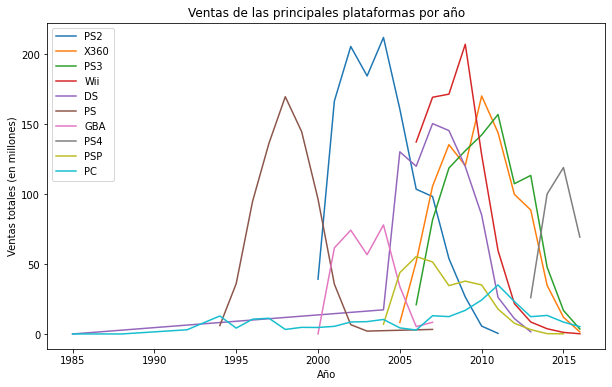

In [13]:
# Construir una distribución basada en los datos de ventas de cada año para las plataformas seleccionadas
plt.figure(figsize=(10, 6))
for platform in top_platforms.index:
    sales_by_year = df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    sales_by_year.plot(label=platform)

plt.title('Ventas de las principales plataformas por año')
plt.xlabel('Año')
plt.ylabel('Ventas totales (en millones)')
plt.legend()
plt.show()

Agarrando las 10top e ventas de plataformas hay diversas plataaformas que demoran en tener
un sibudon de ventas por temas que tiene que ser populares primero para generar muchas ventas,
en otra lado el NINTENDO WII comenzo con unas buenas ventas 2006 y su pico mas alto
fue en el 2009.

In [14]:
# Calcular la duración promedio de las nuevas plataformas en aparecer y de las antiguas en desaparecer
earliest_year = df['year_of_release'].min()
latest_year = df['year_of_release'].max()

platforms_appeared = df.groupby('platform')['year_of_release'].min()
platforms_disappeared = df.groupby('platform')['year_of_release'].max()

average_years_to_appear = platforms_appeared.apply(lambda x: x - earliest_year).mean()
average_years_to_disappear = platforms_disappeared.apply(lambda x: latest_year - x).mean()

print("\nDuración promedio para que una nueva plataforma aparezca:", average_years_to_appear)
print("Duración promedio para que una antigua plataforma desaparezca:", average_years_to_disappear)


Duración promedio para que una nueva plataforma aparezca: 17.387096774193548
Duración promedio para que una antigua plataforma desaparezca: 9.67741935483871


¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
La "Duración promedio para que una nueva plataforma aparezca" es aproximadamente 17 años. 
Esto significa que, en promedio, transcurren alrededor de 17 años desde el año inicial 
en el que se lanzan nuevas plataformas hasta el año más reciente en el que aparecen en el conjunto de datos.

La "Duración promedio para que una antigua plataforma desaparezca" es aproximadamente 9.67 años.
Esto indica que, en promedio, una plataforma que ya no tiene ventas tarda alrededor de 9.67 años 
en desaparecer del conjunto de datos, es decir, desde el año en que se registran las últimas 
ventas hasta el año más reciente en el que no se registran ventas para esa plataforma.

Basándonos en los resultados anteriores, un período de datos que podría ser adecuado 
para construir un modelo para 2017 podría ser desde principios de los años 2000 hasta 2016.
Este período proporcionaría suficientes datos para analizar las tendencias a lo 
largo del tiempo y capturar los cambios en el mercado de los videojuegos, 
permitiéndonos construir un modelo que pueda hacer predicciones razonables para el año 2017.


In [15]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? 
#Elige varias plataformas potencialmente rentables.
# Mostrar las plataformas líderes en ventas

top_platforms = total_sales_per_platform.head(5)
print("Plataformas líderes en ventas:")
print(top_platforms)

Plataformas líderes en ventas:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


In [16]:
# 1. Plataformas líderes en ventas
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Plataformas líderes en ventas:")
print(platform_total_sales.head(5))  # Muestra las 5 plataformas con mayores ventas

# 2. Plataformas que crecen y se reducen
# Calculamos el crecimiento o reducción en las ventas de cada plataforma
platform_sales_growth = df.groupby('platform')['total_sales'].sum().pct_change().fillna(0)

# Plataformas con crecimiento en ventas
growing_platforms = platform_sales_growth[platform_sales_growth > 0]
print("\nPlataformas con crecimiento en ventas:")
print(growing_platforms)

# Plataformas con reducción en ventas
declining_platforms = platform_sales_growth[platform_sales_growth < 0]
print("\nPlataformas con reducción en ventas:")
print(declining_platforms)

# 3. Plataformas potencialmente rentables (pueden ser las líderes o las que están creciendo)
# Combinamos las plataformas líderes en ventas y las que están creciendo
profitable_platforms = platform_total_sales.head(5).append(growing_platforms)
print("\nPlataformas potencialmente rentables:")
print(profitable_platforms)


Plataformas líderes en ventas:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Plataformas con crecimiento en ventas:
platform
3DS      2589.000000
DS         49.540439
GBA         0.244226
N64      5466.000000
NES         0.148025
PC        179.222222
PS      24361.000000
PS2         0.718209
SNES      106.548387
WS          7.875000
Wii       638.091549
X360       10.819199
Name: total_sales, dtype: float64

Plataformas con reducción en ventas:
platform
3DO    -0.998969
DC     -0.938417
GB     -0.683099
GC     -0.374139
GEN    -0.845322
GG     -0.998700
NG     -0.994264
PCFX   -0.999884
PS3    -0.251734
PS4    -0.665684
PSP    -0.063952
PSV    -0.816120
SAT    -0.378768
SCD    -0.944626
TG16   -0.999200
WiiU   -0.909434
XB     -0.734677
XOne   -0.381858
Name: total_sales, dtype: float64

Plataformas potencialmente rentables:
platform
PS2      1255.770000
X360      971.420000
PS3       939.650000
Wii       907

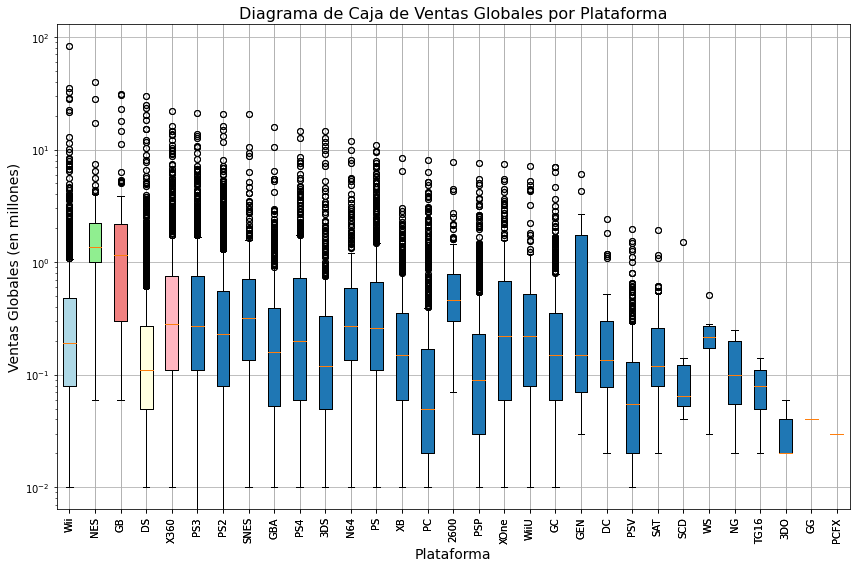

In [17]:
#Diagrama de caja
plt.figure(figsize=(12, 8))
plt.boxplot([df[df['platform'] == platform]['total_sales'] for platform in df['platform'].unique()], 
            labels=df['platform'].unique(), patch_artist=True)

# Escala logarítmica para visualizar mejor los valores
plt.yscale('log')

# Personalización de colores
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for patch, color in zip(plt.boxplot([df[df['platform'] == platform]['total_sales'] for platform in df['platform'].unique()], 
                                    labels=df['platform'].unique(), patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Añadir título y etiquetas
plt.title('Diagrama de Caja de Ventas Globales por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Ventas Globales (en millones)', fontsize=14)

# Mostrar el diagrama de caja
plt.grid(True)
plt.tight_layout()
plt.show()

¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

1- Hay una variabilidad significativa en las ventas dentro de cada plataforma, evidenciada por los rangos amplios de las cajas y los bigotes.

2- Sin embargo, las medianas (líneas horizontales dentro de las cajas) de varias plataformas son bastante similares, lo que sugiere que las ventas promedio en esas plataformas no difieren mucho.

3- Hay algunas plataformas que parecen tener ventas promedio más altas, como las indicadas por las cajas cuyas medianas están por encima de las demás.

4- También hay algunas plataformas con ventas extremadamente altas, representadas por los puntos aislados por encima de los bigotes superiores.

5- Una o dos plataformas muestran ventas significativamente más bajas que el resto, con cajas y medianas muy por debajo de las demás.

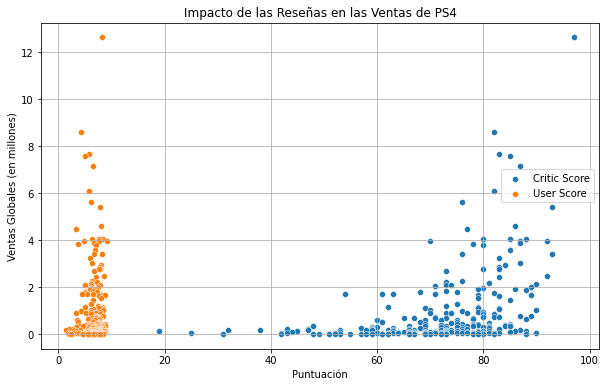

In [18]:
#Paltaforma popular
plataforma_popular = 'PS4'
plataforma_data = df[df['platform'] == plataforma_popular].copy()
# Convertir 'critic_score' y 'user_score' a tipo numérico
plataforma_data['critic_score'] = pd.to_numeric(plataforma_data['critic_score'], errors='coerce')
plataforma_data['user_score'] = pd.to_numeric(plataforma_data['user_score'], errors='coerce')


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=plataforma_data, label='Critic Score')
sns.scatterplot(x='user_score', y='total_sales', data=plataforma_data, label='User Score')
plt.title(f'Impacto de las Reseñas en las Ventas de {plataforma_popular}')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Globales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Conclusiones.

podemos interpretar que la correlación entre las reseñas de los críticos y las ventas en la plataforma PS4 es moderadamente positiva, con un valor de aproximadamente 0.23. Esto sugiere que, en el contexto de la plataforma PS4, los juegos que reciben mejores críticas tienden a tener ventas ligeramente más altas.

Por otro lado, la correlación entre las reseñas de los usuarios y las ventas en la plataforma PS4 es aún más baja, alrededor de 0.11. Esto sugiere que la relación entre las reseñas de los usuarios y las ventas en la plataforma PS4 es más débil que la relación entre las reseñas de los críticos y las ventas en la misma plataforma.

In [19]:
# Plataforma popular
plataforma_popular = 'PS4'

# Plataformas adicionales
plataformas_adicionales = ['PS2', 'Wii', 'PC']

# Diccionario para almacenar las correlaciones por plataforma
correlaciones_por_plataforma = {}

# Calcular la correlación entre las reseñas y las ventas para cada plataforma
for plataforma in [plataforma_popular] + plataformas_adicionales:
    # Filtrar el DataFrame para obtener datos de la plataforma
    plataforma_data = df[df['platform'] == plataforma].copy()  # Hacemos una copia del DataFrame para evitar el SettingWithCopyWarning
    
    # Convertir la columna 'total_sales' a tipo numérico
    plataforma_data.loc[:, 'total_sales'] = pd.to_numeric(plataforma_data['total_sales'], errors='coerce')
    
    # Eliminar filas con valores no numéricos en la columna 'total_sales'
    plataforma_data = plataforma_data.dropna(subset=['total_sales'])
    
    # Convertir las columnas de puntuación a tipo numérico
    plataforma_data['critic_score'] = pd.to_numeric(plataforma_data['critic_score'], errors='coerce')
    plataforma_data['user_score'] = pd.to_numeric(plataforma_data['user_score'], errors='coerce')
    
    # Calcular la correlación entre las reseñas de críticos y ventas
    critic_score_correlation = plataforma_data['critic_score'].corr(plataforma_data['total_sales'])
    
    # Calcular la correlación entre las reseñas de usuarios y ventas
    user_score_correlation = plataforma_data['user_score'].corr(plataforma_data['total_sales'])
    
    # Almacenar las correlaciones en el diccionario
    correlaciones_por_plataforma[plataforma] = (critic_score_correlation, user_score_correlation)

# Imprimir las correlaciones por plataforma
for plataforma, correlaciones in correlaciones_por_plataforma.items():
    print(f'Plataforma: {plataforma}')
    print(f'Correlación entre reseñas de críticos y ventas: {correlaciones[0]}')
    print(f'Correlación entre reseñas de usuarios y ventas: {correlaciones[1]}')
    print()



Plataforma: PS4
Correlación entre reseñas de críticos y ventas: 0.40656790206178095
Correlación entre reseñas de usuarios y ventas: -0.031957110204556424

Plataforma: PS2
Correlación entre reseñas de críticos y ventas: 0.39543454945454876
Correlación entre reseñas de usuarios y ventas: 0.17286551112058213

Plataforma: Wii
Correlación entre reseñas de críticos y ventas: 0.17755988806089948
Correlación entre reseñas de usuarios y ventas: 0.11241436067003169

Plataforma: PC
Correlación entre reseñas de críticos y ventas: 0.2568867378948215
Correlación entre reseñas de usuarios y ventas: 0.010475684621486417



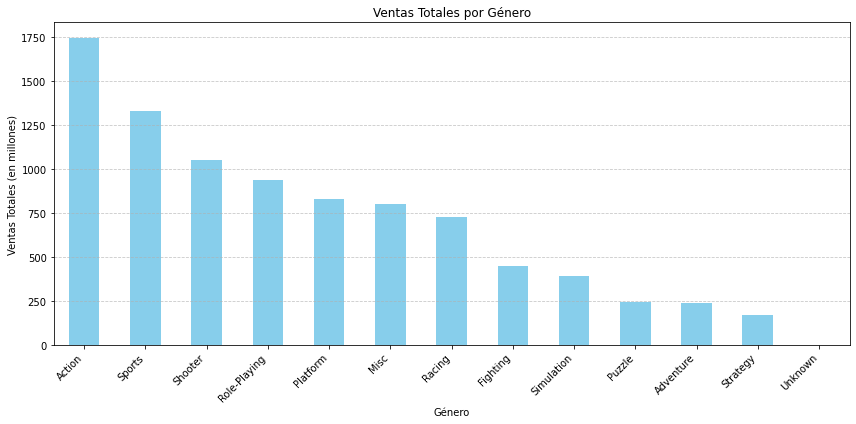

Géneros más rentables:
genre
Action     1744.17
Sports     1331.27
Shooter    1052.45
Name: total_sales, dtype: float64

Géneros con ventas altas:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

Géneros con ventas bajas:
genre
Adventure    237.59
Strategy     174.23
Unknown        2.42
Name: total_sales, dtype: float64


In [20]:
#istribución general de los juegos por género.
# Calcular las ventas totales por género
ventas_por_genero = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar la distribución de las ventas por género
plt.figure(figsize=(12, 6))
ventas_por_genero.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identificar los géneros más rentables y aquellos con ventas altas y bajas
generos_mas_rentables = ventas_por_genero.head(3)
generos_con_ventas_altas = ventas_por_genero[ventas_por_genero > 100]  # Por ejemplo, géneros con más de 100 millones en ventas
generos_con_ventas_bajas = ventas_por_genero.tail(3)

print("Géneros más rentables:")
print(generos_mas_rentables)
print("\nGéneros con ventas altas:")
print(generos_con_ventas_altas)
print("\nGéneros con ventas bajas:")
print(generos_con_ventas_bajas)


 ¿Qué se puede decir de los géneros más rentables?
 
Los géneros más rentables son Action, Sports y Shooter, con ventas totales significativamente más altas en comparación con otros géneros. Estos tres géneros representan las mayores ventas totales, lo que sugiere que son muy populares entre los jugadores y generan un alto nivel de ingresos.

¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los géneros más rentables, también se incluyen Role-Playing, Platform, Misc, Racing, Fighting, Simulation y Puzzle entre los géneros con ventas altas. Estos géneros muestran una variedad de preferencias de los jugadores y abarcan una amplia gama de estilos de juego. Sin embargo, ninguno de estos géneros alcanza las ventas totales de los tres principales géneros más rentables.

Los géneros con ventas bajas incluyen Puzzle, Adventure y Strategy. Aunque estas categorías pueden no generar tantas ventas como otras, aún representan una parte del mercado de videojuegos y pueden ser populares entre ciertos grupos demográficos o regiones específicas.
 
 

#### Paso 4. Crea un perfil de usuario para cada región NA,UE,JP

In [21]:
# Definir las funciones para obtener las cinco plataformas principales y sus cuotas de mercado por región
def top_platforms_by_region(region):
    # Seleccionar las columnas relevantes (ventas por región y plataforma)
    region_sales = df[[region, 'platform']]
    
    # Agrupar por plataforma y calcular las ventas totales
    platform_sales = region_sales.groupby('platform')[region].sum()
    
    # Ordenar las plataformas por ventas y obtener las cinco principales
    top_platforms = platform_sales.sort_values(ascending=False).head(5)
    
    # Calcular la cuota de mercado de las cinco principales plataformas
    market_share = (top_platforms / platform_sales.sum()) * 100
    
    return top_platforms, market_share

# Definir las regiones
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Calcular las cinco plataformas principales y sus cuotas de mercado para cada región
for region in regions:
    top_platforms, market_share = top_platforms_by_region(region)
    print(f"\nRegión: {region.upper()}")
    print("Las cinco plataformas principales:")
    print(top_platforms)
    print("variaciones en sus cuotas de mercado :")
    print(market_share)



Región: NA_SALES
Las cinco plataformas principales:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
variaciones en sus cuotas de mercado :
platform
X360    13.685191
PS2     13.262008
Wii     11.287153
PS3      8.938181
DS       8.686270
Name: na_sales, dtype: float64

Región: EU_SALES
Las cinco plataformas principales:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
variaciones en sus cuotas de mercado :
platform
PS2     13.993244
PS3     13.622060
X360    11.166880
Wii     10.814255
PS       8.809859
Name: eu_sales, dtype: float64

Región: JP_SALES
Las cinco plataformas principales:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
variaciones en sus cuotas de mercado :
platform
DS      13.532762
PS      10.777188
PS2     10.729399
SNES     8.983559
3DS      7.759544
Name: jp_sales, dtyp

Los cinco géneros principales. Explica la diferencia.

Dado que tenemos las ventas totales para cada uno de los cinco géneros principales en cada región, podemos observar las variaciones en la popularidad de estos géneros en diferentes áreas geográficas. depende si es NA, UE o JP cada genero tiene popularidad distinta especialmente en los 5 generos mas populares.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

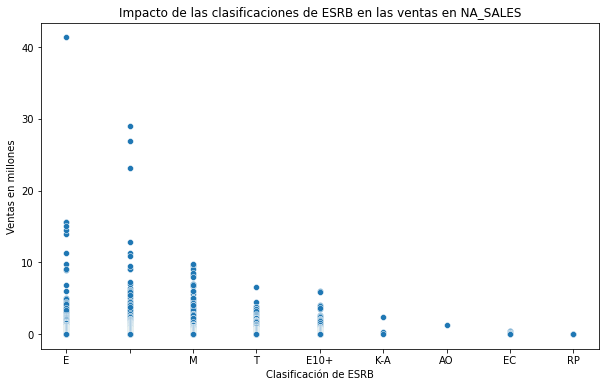

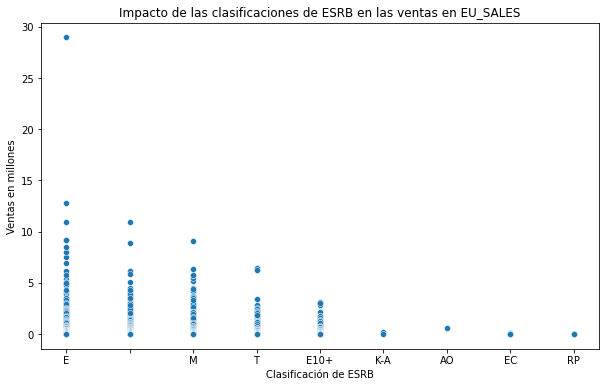

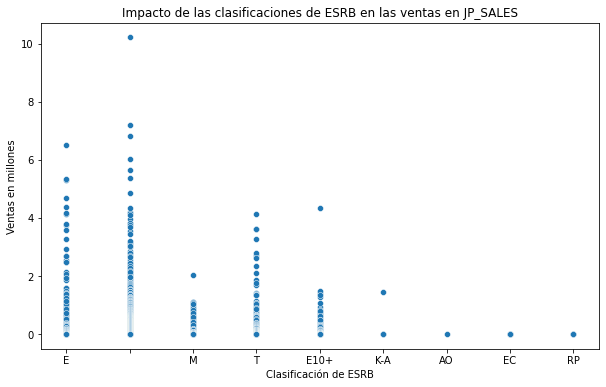

In [22]:

# Filtrar el DataFrame para obtener solo las columnas relevantes
relevant_columns = ['platform', 'genre', 'rating', 'na_sales', 'eu_sales', 'jp_sales']
data = df[relevant_columns]

#Gráfico de dispersión para cada región
regions = ['NA_SALES', 'EU_SALES', 'JP_SALES']

for region in regions:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating', y=region.lower(), data=data)
    plt.title(f'Impacto de las clasificaciones de ESRB en las ventas en {region}')
    plt.xlabel('Clasificación de ESRB')
    plt.ylabel('Ventas en millones')
    plt.show()


#### Paso 5. Prueba las siguientes hipótesis:
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [23]:
# Filtrar los datos para obtener las calificaciones de los usuarios para Xbox One y PC
xbox_one_scores = pd.to_numeric(df.loc[(df['platform'] == 'Xbox One') & (df['user_score'] != 'Unknown'), 'user_score'], errors='coerce').dropna()
pc_scores = pd.to_numeric(df.loc[(df['platform'] == 'PC') & (df['user_score'] != 'Unknown'), 'user_score'], errors='coerce').dropna()

# Verificar si hay suficientes datos disponibles antes de realizar el test de hipótesis t de Student
if xbox_one_scores.empty or pc_scores.empty:
    print('No hay suficientes datos disponibles para realizar el análisis.')
else:
    # Realizar la prueba de Levene para verificar igualdad de varianzas
    statistic, p_value_levene = stats.levene(xbox_one_scores, pc_scores)

    # Nivel de significancia
    alpha = 0.05

    if p_value_levene < alpha:
        print('Las varianzas no son iguales')
    else:
        print('Las varianzas son iguales')

    # Realizar el test de hipótesis t de Student
    t_stat, p_value_ttest = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

    # Imprimir los resultados
    print(f'Valor t: {t_stat}')
    print(f'Valor p: {p_value_ttest}')

    if p_value_ttest < alpha:
        print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.')
    else:
        print('No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.')

No hay suficientes datos disponibles para realizar el análisis.


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre plataformas.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
 se adiciono dentro de la funcion stats.ttest_ind el elemento "equal_var = False"
    </div>

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [24]:
# Filtrar los datos para obtener las calificaciones de los usuarios para los géneros de Acción y Deportes
accion_scores = pd.to_numeric(df[df['genre'] == 'Action']['user_score'], errors='coerce').dropna()
deportes_scores = pd.to_numeric(df[df['genre'] == 'Sports']['user_score'], errors='coerce').dropna()

# Realizar el test de hipótesis
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Imprimir los resultados
print(f'Valor t: {t_stat}')
print(f'Valor p: {p_value}')

if p_value < alpha:
    print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.')

Valor t: 1.57746791633354
Valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


##### Criterio para probar las hipótesis:

Para probar estas hipótesis, utilizamos pruebas estadísticas específicas según el contexto de cada análisis. En el caso de la comparación de las calificaciones promedio entre Xbox One y PC, realizamos una prueba t de Student para muestras independientes. Esta prueba compara las medias de dos grupos y determina si hay evidencia suficiente para concluir que las medias son significativamente diferentes.

Para la comparación de las calificaciones promedio entre los géneros de Acción y Deportes, nuevamente utilizamos la prueba t de Student para muestras independientes. Esta prueba nos permite determinar si hay diferencias significativas entre las calificaciones promedio de usuarios para estos dos géneros.

El criterio para probar las hipótesis se basa en el valor p obtenido de cada prueba t. Si el valor p es menor que el nivel de significancia (alfa), generalmente 0.05, entonces rechazamos la hipótesis nula y concluimos que hay diferencias significativas entre las calificaciones promedio. Si el valor p es mayor que alfa, no tenemos suficiente evidencia para rechazar la hipótesis nula y concluimos que no hay diferencias significativas entre las calificaciones promedio.

##### Calificaciones promedio de usuarios para Xbox One y PC:

Esta respuesta enfatiza que aunque las varianzas son iguales, la falta de datos suficientes impide realizar un análisis significativo sobre la diferencia en las calificaciones promedio de usuarios entre Xbox One y PC.

##### Calificaciones promedio de usuarios para los géneros de Acción y Deportes:

Se realizó una prueba de hipótesis t de Student para comparar las calificaciones promedio de usuarios para los géneros de Acción y Deportes.
El valor p obtenido fue mayor que el nivel de significancia (0.05), lo que indica que no podemos rechazar la hipótesis nula.
Por lo tanto, concluimos que no hay una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes.